In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import math

In [2]:
spray_data = pd.read_csv("west_nile/input/spray.csv")
weather_data = pd.read_csv("west_nile/input/weather.csv")
train_data_unmerged = pd.read_csv("west_nile/input/train.csv")
test_data_unmerged = pd.read_csv("west_nile/input/test.csv")

In [3]:
weather_data = weather_data.replace('-', np.nan)
weather_data = weather_data.replace('M', np.nan)

C:\Users\User\AppData\Local\Temp\ipykernel_13216\650908028.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_data = weather_data.replace('M', np.nan)


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2933 non-null   object 
 5   Depart       1472 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2940 non-null   object 
 8   Heat         2933 non-null   object 
 9   Cool         2933 non-null   object 
 10  Sunrise      1472 non-null   object 
 11  Sunset       1472 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        1472 non-null   object 
 14  Water1       0 non-null      float64
 15  SnowFall     1472 non-null   object 
 16  PrecipTotal  2942 non-null   object 
 17  StnPressure  2940 non-null   object 
 18  SeaLevel     2935 non-null   object 
 19  Result

In [5]:
nulls = weather_data.isna().sum().to_frame().reset_index()
nulls = nulls[nulls.iloc[:, 1] != 0]
nulls

index     0
4          Tavg    11
5        Depart  1472
7       WetBulb     4
8          Heat    11
9          Cool    11
10      Sunrise  1472
11       Sunset  1472
13        Depth  1472
14       Water1  2944
15     SnowFall  1472
16  PrecipTotal     2
17  StnPressure     4
18     SeaLevel     9
21     AvgSpeed     3

In [6]:
weather_data['Date']  = pd.to_datetime(weather_data['Date'])
train_data_unmerged['Date']  = pd.to_datetime(train_data_unmerged['Date'])
test_data_unmerged['Date']  = pd.to_datetime(test_data_unmerged['Date'])

In [7]:
weather_data['Date'].nunique()

1472

In [8]:
weather_data['Tavg'] = weather_data['Tavg'].astype(float)

In [9]:
(weather_data['Tavg'] == np.ceil((weather_data['Tmax'] + weather_data['Tmin']) / 2)).sum()

np.int64(2933)

In [10]:
weather_data['Tavg'] = np.ceil((weather_data['Tmax'] + weather_data['Tmin']) / 2)

In [11]:
cols_to_drop = ['Depart','Depth','Water1','SnowFall','Sunrise','Sunset']
weather_data = weather_data.drop(cols_to_drop, axis=1)
columns_to_float = ['Heat','Cool','StnPressure','SeaLevel','AvgSpeed']
weather_data[columns_to_float] = weather_data[columns_to_float].apply(pd.to_numeric, errors='coerce')

In [12]:
weather_data

Station       Date  Tmax  Tmin  Tavg  DewPoint WetBulb  Heat  Cool  \
0           1 2007-05-01    83    50  67.0        51      56   0.0   2.0   
1           2 2007-05-01    84    52  68.0        51      57   0.0   3.0   
2           1 2007-05-02    59    42  51.0        42      47  14.0   0.0   
3           2 2007-05-02    60    43  52.0        42      47  13.0   0.0   
4           1 2007-05-03    66    46  56.0        40      48   9.0   0.0   
...       ...        ...   ...   ...   ...       ...     ...   ...   ...   
2939        2 2014-10-29    49    40  45.0        34      42  20.0   0.0   
2940        1 2014-10-30    51    32  42.0        34      40  23.0   0.0   
2941        2 2014-10-30    53    37  45.0        35      42  20.0   0.0   
2942        1 2014-10-31    47    33  40.0        25      33  25.0   0.0   
2943        2 2014-10-31    49    34  42.0        29      36  23.0   0.0   

       CodeSum PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0                     0.00        29.10     29.82          1.7         27   
1                     0.00        29.18     29.82          2.7         25   
2           BR        0.00        29.38     30.09         13.0          4   
3        BR HZ        0.00        29.44     30.08         13.3          2   
4                     0.00        29.39     30.12         11.7          7   
...        ...         ...          ...       ...          ...        ...   
2939                  0.00        29.42     30.07          8.5         29   
2940                  0.00        29.34     30.09          5.1         24   
2941        RA           T        29.41     30.10          5.9         23   
2942     RA SN        0.03        29.49     30.20         22.6         34   
2943  RA SN BR        0.04        29.54     30.20         21.7         34   

      AvgSpeed  
0          9.2  
1          9.6  
2         13.4  
3         13.4  
4         11.9  
...        ...  
2939       9.0  
2940       5.5  
2941       6.5  
2942      22.9  
2943      22.6  

[2944 rows x 16 columns]

In [13]:
weather_data['WetBulb'] = weather_data['WetBulb'].astype(float)
weather_data[["WetBulb","DewPoint","Tavg"]].corr()

WetBulb  DewPoint      Tavg
WetBulb   1.000000  0.972501  0.960686
DewPoint  0.972501  1.000000  0.881411
Tavg      0.960686  0.881411  1.000000

In [14]:
(weather_data['WetBulb'] == np.ceil((weather_data['Tavg'] + weather_data['DewPoint']) / 2)-8).sum()

np.int64(0)

In [15]:
chart = alt.Chart(weather_data).mark_line().encode(
    x='Date',
    y='Heat',
    color = 'Station',
    tooltip=['Date', 'Heat','Station']
).properties(
    width=600,
    height=500,
    title='Weather Measurements Over Time by Station'
).interactive()

chart


alt.Chart(...)

In [16]:
chart = alt.Chart(weather_data).mark_line().encode(
    x='Date',
    y='Cool',
    color = 'Station',
    tooltip=['Date', 'Cool','Station']
).properties(
    width=600,
    height=500,
    title='Weather Measurements Over Time by Station'
).interactive()

chart


alt.Chart(...)

In [17]:
weather_data['Heat'] = weather_data['Heat'].ffill()
weather_data['Cool'] = weather_data['Cool'].ffill()

In [18]:
weather_data['PrecipTotal'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2944 entries, 0 to 2943
Series name: PrecipTotal
Non-Null Count  Dtype 
--------------  ----- 
2942 non-null   object
dtypes: object(1)
memory usage: 23.1+ KB


In [19]:
weather_data['PrecipTotal'] = weather_data['PrecipTotal'].fillna('0')
weather_data = weather_data.replace('  T', '0.001')
weather_data['PrecipTotal'] = weather_data['PrecipTotal'].astype(float)

In [20]:
station_1 = weather_data[weather_data['Station'] == 1].reset_index()
station_2 = weather_data[weather_data['Station'] == 2].reset_index()

In [21]:
station_1

index  Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  \
0         0        1 2007-05-01    83    50  67.0        51     56.0   0.0   
1         2        1 2007-05-02    59    42  51.0        42     47.0  14.0   
2         4        1 2007-05-03    66    46  56.0        40     48.0   9.0   
3         6        1 2007-05-04    66    49  58.0        41     50.0   7.0   
4         8        1 2007-05-05    66    53  60.0        38     49.0   5.0   
...     ...      ...        ...   ...   ...   ...       ...      ...   ...   
1467   2934        1 2014-10-27    77    51  64.0        51     58.0   1.0   
1468   2936        1 2014-10-28    68    45  57.0        38     47.0   8.0   
1469   2938        1 2014-10-29    49    36  43.0        32     40.0  22.0   
1470   2940        1 2014-10-30    51    32  42.0        34     40.0  23.0   
1471   2942        1 2014-10-31    47    33  40.0        25     33.0  25.0   

      Cool CodeSum  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0      2.0                0.000        29.10     29.82          1.7   
1      0.0      BR        0.000        29.38     30.09         13.0   
2      0.0                0.000        29.39     30.12         11.7   
3      0.0      RA        0.001        29.31     30.05         10.4   
4      0.0                0.001        29.40     30.10         11.7   
...    ...     ...          ...          ...       ...          ...   
1467   0.0                0.000        28.92     29.66         12.0   
1468   0.0                0.001        29.15     29.85         14.8   
1469   0.0                0.000        29.36     30.06          9.5   
1470   0.0                0.000        29.34     30.09          5.1   
1471   0.0   RA SN        0.030        29.49     30.20         22.6   

      ResultDir  AvgSpeed  
0            27       9.2  
1             4      13.4  
2             7      11.9  
3             8      10.8  
4             7      12.0  
...         ...       ...  
1467         19      12.9  
1468         26      15.6  
1469         29       9.9  
1470         24       5.5  
1471         34      22.9  

[1472 rows x 17 columns]

In [22]:
station_2

index  Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  \
0         1        2 2007-05-01    84    52  68.0        51     57.0   0.0   
1         3        2 2007-05-02    60    43  52.0        42     47.0  13.0   
2         5        2 2007-05-03    67    48  58.0        40     50.0   7.0   
3         7        2 2007-05-04    78    51  65.0        42     50.0   7.0   
4         9        2 2007-05-05    66    54  60.0        39     50.0   5.0   
...     ...      ...        ...   ...   ...   ...       ...      ...   ...   
1467   2935        2 2014-10-27    79    54  67.0        52     59.0   0.0   
1468   2937        2 2014-10-28    66    48  57.0        40     48.0   8.0   
1469   2939        2 2014-10-29    49    40  45.0        34     42.0  20.0   
1470   2941        2 2014-10-30    53    37  45.0        35     42.0  20.0   
1471   2943        2 2014-10-31    49    34  42.0        29     36.0  23.0   

      Cool   CodeSum  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0      3.0                  0.000        29.18     29.82          2.7   
1      0.0     BR HZ        0.000        29.44     30.08         13.3   
2      0.0        HZ        0.000        29.46     30.12         12.9   
3      0.0                  0.000        29.36     30.04         10.1   
4      0.0                  0.001        29.46     30.09         11.2   
...    ...       ...          ...          ...       ...          ...   
1467   2.0        RA        0.020        29.00     29.67         12.7   
1468   0.0        RA        0.030        29.23     29.85         14.0   
1469   0.0                  0.000        29.42     30.07          8.5   
1470   0.0        RA        0.001        29.41     30.10          5.9   
1471   0.0  RA SN BR        0.040        29.54     30.20         21.7   

      ResultDir  AvgSpeed  
0            25       9.6  
1             2      13.4  
2             6      13.2  
3             7      10.4  
4             7      11.5  
...         ...       ...  
1467         19      13.6  
1468         26      14.6  
1469         29       9.0  
1470         23       6.5  
1471         34      22.6  

[1472 rows x 17 columns]

In [23]:
pressure_diff = station_2['StnPressure'].sub(station_1['StnPressure']).to_frame()
pressure_diff.dropna()
pressure_diff.mean()

StnPressure    0.060599
dtype: float64

In [24]:
pressure_diff.mode()

StnPressure
0         0.06

In [25]:
nulls_stn = weather_data['StnPressure'].isna().reset_index()
nulls_stn = nulls_stn[nulls_stn.iloc[:, 1] != 0]
nulls_stn

index  StnPressure
87       87         True
848     848         True
2410   2410         True
2411   2411         True

In [26]:
weather_data.loc[87,'StnPressure'] = weather_data.loc[86,'StnPressure']+0.06
weather_data.loc[848,'StnPressure'] = weather_data.loc[849,'StnPressure']-0.06
weather_data.loc[2410,'StnPressure'] = weather_data.loc[2408,'StnPressure']
weather_data.loc[2411,'StnPressure'] = weather_data.loc[2409,'StnPressure']

In [27]:
weather_data['WetBulb'] = weather_data['WetBulb'].fillna(method='bfill', inplace=False).where(weather_data['Station']==1, weather_data['WetBulb'])
weather_data['WetBulb'] = weather_data['WetBulb'].fillna(method='ffill', inplace=False).where(weather_data['Station']==2, weather_data['WetBulb'])
weather_data['SeaLevel'] = weather_data['SeaLevel'].fillna(method='bfill', inplace=False).where(weather_data['Station']==1, weather_data['SeaLevel'])
weather_data['SeaLevel'] = weather_data['SeaLevel'].fillna(method='ffill', inplace=False).where(weather_data['Station']==2, weather_data['SeaLevel'])

C:\Users\User\AppData\Local\Temp\ipykernel_13216\1009222570.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data['WetBulb'] = weather_data['WetBulb'].fillna(method='bfill', inplace=False).where(weather_data['Station']==1, weather_data['WetBulb'])
C:\Users\User\AppData\Local\Temp\ipykernel_13216\1009222570.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data['WetBulb'] = weather_data['WetBulb'].fillna(method='ffill', inplace=False).where(weather_data['Station']==2, weather_data['WetBulb'])
C:\Users\User\AppData\Local\Temp\ipykernel_13216\1009222570.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data['SeaLevel'] = weather_data['SeaLevel'].fillna(method='bfill', inplace=False).where(weather

In [28]:
speed_diff = station_1['AvgSpeed'].sub(station_2['AvgSpeed']).to_frame()
speed_diff.dropna()
speed_diff.abs().mean()

AvgSpeed    0.770592
dtype: float64

In [29]:
speed_diff.value_counts()

AvgSpeed
 0.0        69
 0.5        60
-0.5        55
-0.1        38
 0.6        37
            ..
 3.0         1
 3.7         1
 4.0         1
 4.1         1
 4.9         1
Name: count, Length: 172, dtype: int64

In [30]:
weather_data['AvgSpeed'] = weather_data['AvgSpeed'].fillna(weather_data['AvgSpeed'].ffill() + 0.5)


In [31]:
weather_data['CodeSum'] = weather_data['CodeSum'].replace(' ', 'NA')

In [32]:
weather_code_map = {
        "FC+": "Tornado/Waterspout",
        "FC": "Funnel Cloud",
        "TS": "Thunderstorm",
        "GR": "Hail",
        "RA": "Rain",
        "TSRA": "Thunderstorm Rain",
        "DZ": "Drizzle",
        "SN": "Snow",
        "SG": "Snow Grains",
        "GS": "Small Hail and/or Snow Pellets",
        "PL": "Ice Pellets",
        "IC": "Ice Crystals",
        "FG+": "Heavy Fog",
        "FG": "Fog",
        "BR": "Mist",
        "UP": "Unknown Precipitation",
        "HZ": "Haze",
        "FU": "Smoke",
        "VA": "Volcanic Ash",
        "DU": "Widespread Dust",
        "DS": "Duststorm",
        "PO": "Sand/Dust Whirls",
        "SA": "Sand",
        "SS": "Sandstorm",
        "PY": "Spray",
        "SQ": "Squall",
        "DR": "Low Drifting",
        "SH": "Shower",
        "FZ": "Freezing",
        "MI": "Shallow",
        "PR": "Partial",
        "BC": "Patches",
        "BL": "Blowing",
        "VC": "Vicinity",
        "VCTS": "Vicinity Thunderstorm",
        "-": "Light",
        "+": "Heavy",
        "NA": "Moderate"
    }

def decode_row(row):
        decoded_codes = []
        for code in row.split():
            if code in weather_code_map:
                decoded_codes.append(weather_code_map[code])
            else:
                decoded_codes.append(code)  # Keep unrecognized codes as is
        return ' '.join(decoded_codes)
    
    # df[column_name + "_decoded"] = df[column_name].astype(str).apply(
    #     lambda x: ' '.join([weather_code_map.get(code, code) for code in x.split()]))
weather_data['CodeSum'] = weather_data['CodeSum'].astype(str).apply(decode_row)
    


In [33]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   float64       
 7   Heat         2944 non-null   float64       
 8   Cool         2944 non-null   float64       
 9   CodeSum      2944 non-null   object        
 10  PrecipTotal  2944 non-null   float64       
 11  StnPressure  2944 non-null   float64       
 12  SeaLevel     2944 non-null   float64       
 13  ResultSpeed  2944 non-null   float64       
 14  ResultDir    2944 non-null   int64         
 15  AvgSpeed     2944 non-null   float64       
dtypes: dat

In [34]:
weather_data.isna().sum().sum()

np.int64(0)

In [35]:
weather_data

Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  \
0           1 2007-05-01    83    50  67.0        51     56.0   0.0   2.0   
1           2 2007-05-01    84    52  68.0        51     57.0   0.0   3.0   
2           1 2007-05-02    59    42  51.0        42     47.0  14.0   0.0   
3           2 2007-05-02    60    43  52.0        42     47.0  13.0   0.0   
4           1 2007-05-03    66    46  56.0        40     48.0   9.0   0.0   
...       ...        ...   ...   ...   ...       ...      ...   ...   ...   
2939        2 2014-10-29    49    40  45.0        34     42.0  20.0   0.0   
2940        1 2014-10-30    51    32  42.0        34     40.0  23.0   0.0   
2941        2 2014-10-30    53    37  45.0        35     42.0  20.0   0.0   
2942        1 2014-10-31    47    33  40.0        25     33.0  25.0   0.0   
2943        2 2014-10-31    49    34  42.0        29     36.0  23.0   0.0   

             CodeSum  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0           Moderate        0.000        29.10     29.82          1.7   
1           Moderate        0.000        29.18     29.82          2.7   
2               Mist        0.000        29.38     30.09         13.0   
3          Mist Haze        0.000        29.44     30.08         13.3   
4           Moderate        0.000        29.39     30.12         11.7   
...              ...          ...          ...       ...          ...   
2939        Moderate        0.000        29.42     30.07          8.5   
2940        Moderate        0.000        29.34     30.09          5.1   
2941            Rain        0.001        29.41     30.10          5.9   
2942       Rain Snow        0.030        29.49     30.20         22.6   
2943  Rain Snow Mist        0.040        29.54     30.20         21.7   

      ResultDir  AvgSpeed  
0            27       9.2  
1            25       9.6  
2             4      13.4  
3             2      13.4  
4             7      11.9  
...         ...       ...  
2939         29       9.0  
2940         24       5.5  
2941         23       6.5  
2942         34      22.9  
2943         34      22.6  

[2944 rows x 16 columns]

In [36]:
spray_data.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [37]:
spray_data.duplicated().sum()
spray_data = spray_data.drop_duplicates()
spray_data = spray_data.drop('Time',axis =1)

In [38]:
def haversine_distance(lat1, lon1, lat2, lon2):

    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance


# Example Usage
station_1_lat, station_1_lon = 41.995, -87.933
station_2_lat, station_2_lon = 41.786, -87.752

distance_km = haversine_distance(station_1_lat, station_1_lon, station_2_lat, station_2_lon)

train_data_unmerged['Nearest_Station'] = train_data_unmerged.apply(
    lambda row: (
        1 if haversine_distance(row['Latitude'], row['Longitude'], station_1_lat, station_1_lon) <
                      haversine_distance(row['Latitude'], row['Longitude'], station_2_lat, station_2_lon) 
        else 2
    ),
    axis=1
)

test_data_unmerged['Nearest_Station'] = test_data_unmerged.apply(
    lambda row: (
        1 if haversine_distance(row['Latitude'], row['Longitude'], station_1_lat, station_1_lon) <= 
                      haversine_distance(row['Latitude'], row['Longitude'], station_2_lat, station_2_lon) 
        else 2
    ),
    axis=1
)



In [39]:
train_data = pd.merge(
    train_data_unmerged, 
    weather_data, 
    left_on=['Nearest_Station', 'Date'],  
    right_on=['Station', 'Date'],
    how='left' 
)

train_data

Date                                            Address  \
0     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2     2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
...          ...                                                ...   
10501 2013-09-26      5100 West 72nd Street, Chicago, IL 60638, USA   
10502 2013-09-26    5800 North Ridge Avenue, Chicago, IL 60660, USA   
10503 2013-09-26  1700 North Ashland Avenue, Chicago, IL 60622, USA   
10504 2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
10505 2013-09-26      4200 West 65th Street, Chicago, IL 60621, USA   

                      Species  Block           Street  Trap  \
0      CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1              CULEX RESTUANS     41   N OAK PARK AVE  T002   
2              CULEX RESTUANS     62    N MANDELL AVE  T007   
3      CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4              CULEX RESTUANS     79     W FOSTER AVE  T015   
...                       ...    ...              ...   ...   
10501  CULEX PIPIENS/RESTUANS     51        W 72ND ST  T035   
10502  CULEX PIPIENS/RESTUANS     58      N RIDGE AVE  T231   
10503  CULEX PIPIENS/RESTUANS     17    N ASHLAND AVE  T232   
10504  CULEX PIPIENS/RESTUANS     71     N HARLEM AVE  T233   
10505  CULEX PIPIENS/RESTUANS     42        W 65TH ST  T235   

                  AddressNumberAndStreet   Latitude  Longitude  \
0      4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1      4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2       6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
3        7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
4        7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
...                                  ...        ...        ...   
10501       5100  W 72ND ST, Chicago, IL  41.763733 -87.742302   
10502     5800  N RIDGE AVE, Chicago, IL  41.987280 -87.666066   
10503   1700  N ASHLAND AVE, Chicago, IL  41.912563 -87.668055   
10504    7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
10505       4200  W 65TH ST, Chicago, IL  41.776428 -87.627096   

       AddressAccuracy  ...  WetBulb  Heat  Cool    CodeSum  PrecipTotal  \
0                    9  ...     65.0   0.0   9.0  Mist Haze          0.0   
1                    9  ...     65.0   0.0   9.0  Mist Haze          0.0   
2                    9  ...     65.0   0.0   9.0  Mist Haze          0.0   
3                    8  ...     65.0   0.0   9.0  Mist Haze          0.0   
4                    8  ...     65.0   0.0   9.0  Mist Haze          0.0   
...                ...  ...      ...   ...   ...        ...          ...   
10501                8  ...     58.0   0.0   0.0   Moderate          0.0   
10502                8  ...     58.0   2.0   0.0       Mist          0.0   
10503                9  ...     58.0   0.0   0.0   Moderate          0.0   
10504                9  ...     58.0   2.0   0.0       Mist          0.0   
10505                8  ...     58.0   0.0   0.0   Moderate          0.0   

       StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0            29.39     30.11          5.8         18       6.5  
1            29.39     30.11          5.8         18       6.5  
2            29.39     30.11          5.8         18       6.5  
3            29.39     30.11          5.8         18       6.5  
4            29.39     30.11          5.8         18       6.5  
...            ...       ...          ...        ...       ...  
10501        29.40     30.04          4.1          9       4.6  
10502        29.34     30.04          3.8          8       4.2  
10503        29.40     30.04          4.1          9       4.6  
10504        29.34     30.04          3.8     

In [40]:
train_data.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Nearest_Station', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

In [41]:
train_data["dayofyear"] = train_data['Date'].dt.dayofyear
train_data['month'] = train_data['Date'].dt.month
train_data['quarter'] = train_data['Date'].dt.quarter

In [42]:
train_data.head(3).T

0  \
Date                                                  2007-05-29 00:00:00   
Address                 4100 North Oak Park Avenue, Chicago, IL 60634,...   
Species                                            CULEX PIPIENS/RESTUANS   
Block                                                                  41   
Street                                                     N OAK PARK AVE   
Trap                                                                 T002   
AddressNumberAndStreet                  4100  N OAK PARK AVE, Chicago, IL   
Latitude                                                         41.95469   
Longitude                                                      -87.800991   
AddressAccuracy                                                         9   
NumMosquitos                                                            1   
WnvPresent                                                              0   
Nearest_Station                                                         1   
Station                                                                 1   
Tmax                                                                   88   
Tmin                                                                   60   
Tavg                                                                 74.0   
DewPoint                                                               58   
WetBulb                                                              65.0   
Heat                                                                  0.0   
Cool                                                                  9.0   
CodeSum                                                         Mist Haze   
PrecipTotal                                                           0.0   
StnPressure                                                         29.39   
SeaLevel                                                            30.11   
ResultSpeed                                                           5.8   
ResultDir                                                              18   
AvgSpeed                                                              6.5   
dayofyear                                                             149   
month                                                                   5   
quarter                                                                 2   

                                                                        1  \
Date                                                  2007-05-29 00:00:00   
Address                 4100 North Oak Park Avenue, Chicago, IL 60634,...   
Species                                                    CULEX RESTUANS   
Block                                                                  41   
Street                                                     N OAK PARK AVE   
Trap                                                                 T002   
AddressNumberAndStreet                  4100  N OAK PARK AVE, Chicago, IL   
Latitude                                                         41.95469   
Longitude                                                      -87.800991   
AddressAccuracy                                                         9   
NumMosquitos                                                            1   
WnvPresent                                                              0   
Nearest_Station                                                         1   
Station                                                                 1   
Tmax                                                                   88   
Tmin                                                                   60   
Tavg                                                                 74.0   
DewPoint                                                               58   
WetBulb                                                              65.0   
Heat                                                               

In [43]:
train_data.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Nearest_Station', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'dayofyear', 'month', 'quarter'],
      dtype='object')

In [46]:
train_data["Species"].value_counts()

Species
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: count, dtype: int64

#### Importing Extra Libraries

In [52]:
pip install ydata-profiling

In [60]:
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import nbformat
print(nbformat.__version__)
fig = px.colors.qualitative.swatches()
fig

5.10.4


In [61]:
# avg temp is different across the stations.
px.box(weather_data,x="Station",y="Tavg",color_discrete_sequence=["green"])

##### the median avg temperature value is higher in station 2 which means the temp in station 2 is higher than station 1. Variation and the range is similar.

###### Quarter 3 (July, August, September)
###### Quarter 2 (April, May, June)
###### Quarter 4 (October, November, December)

In [65]:
px.bar(train_data,x="month",y="PrecipTotal",color_discrete_sequence=["red"])

In [71]:
px.scatter(train_data,x="Tavg",y="PrecipTotal",color="month")

In [84]:
monthly_mosquitoes = train_data.groupby('month')['NumMosquitos'].sum().reset_index()

px.bar(monthly_mosquitoes, x='month', y='NumMosquitos', 
       title='Total Number of Mosquitoes by Month', 
       labels={'NumMosquitos': 'Total Number of Mosquitoes', 'Month': 'Month'},color_discrete_sequence=["green"])

In [85]:
train_data.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Nearest_Station', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'dayofyear', 'month', 'quarter'],
      dtype='object')

In [86]:
fig = px.scatter_mapbox(train_data,
                        lat="Latitude",
                        lon="Longitude",
                        color="WnvPresent",
                        hover_name="Trap",
                        hover_data=["Date", "WnvPresent"],
                        title="Geographical Distribution of Mosquito Traps and West Nile Virus Cases",
                        mapbox_style="carto-positron",
                        zoom=10,
                        height=600)

fig.update_layout(mapbox_center={"lat": 41.8, "lon": -87.75})

fig.show()

In [103]:
filtered_train_data = train_data.query('Species in ["CULEX PIPIENS/RESTUANS","CULEX PIPIENS","CULEX RESTUANS"]')
fig = px.scatter(filtered_train_data, x="Tavg", y="WnvPresent", color="Species", hover_name="Trap", hover_data=["PrecipTotal"], 
    title="Effect of Average Temperature on West Nile Virus Presence by Mosquito Species",
    labels={"Tavg": "Average Temperature (°F)", "WnvPresent": "WNV Present", "Species": "Mosquito Species"}, height=600)

fig.update_layout(xaxis_title="Average Temperature (°F)",
    yaxis_title="West Nile Virus Presence",
    legend_title="Mosquito Species")
fig.show()

In [93]:
pd.crosstab(index=train_data["Species"],columns=train_data["WnvPresent"])

WnvPresent                 0    1
Species                          
CULEX ERRATICUS            1    0
CULEX PIPIENS           2459  240
CULEX PIPIENS/RESTUANS  4490  262
CULEX RESTUANS          2691   49
CULEX SALINARIUS          86    0
CULEX TARSALIS             6    0
CULEX TERRITANS          222    0

<Axes: xlabel='Species'>

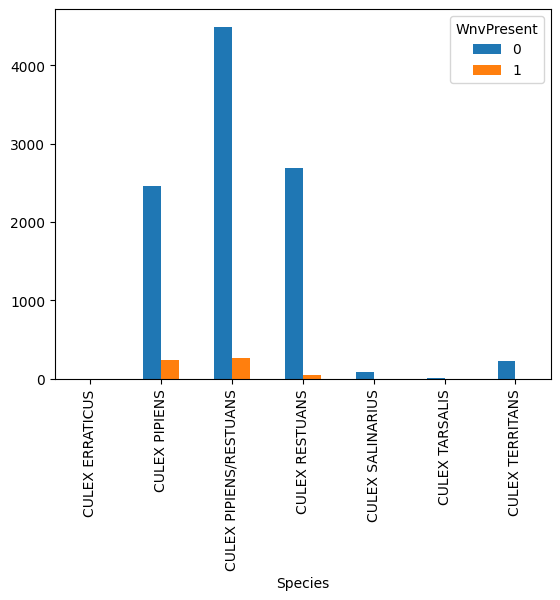

In [91]:
(pd.crosstab(index=train_data["Species"],columns=train_data["WnvPresent"])).plot(kind="bar")

In [ ]:
px.scatter(train_data, x="Tavg", y="NumMosquitos", color="WnvPresent", 
           title="Mosquito Population vs. Average Temperature", 
           labels={"Tavg": "Average Temperature (°F)", "NumMosquitos": "Number of Mosquitos", "WnvPresent": "WNV Present"})

In [108]:
train_data[["DewPoint","WnvPresent"]].corr()

DewPoint  WnvPresent
DewPoint    1.000000    0.084904
WnvPresent  0.084904    1.000000

<Axes: >

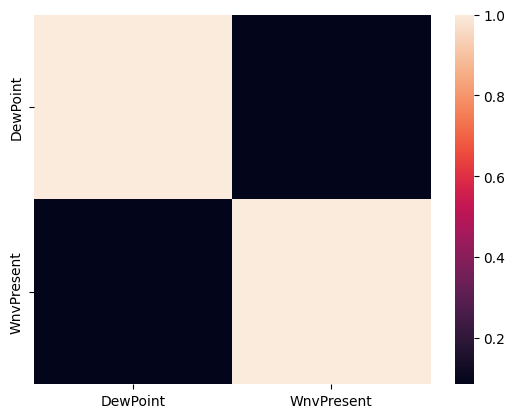

In [109]:
sns.heatmap(train_data[["DewPoint","WnvPresent"]].corr())